<a href="https://colab.research.google.com/github/raman2402/Machine-Learning/blob/main/diabetes_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scikit-learn

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.datasets import load_diabetes


In [7]:
diabetes=load_diabetes();

In [8]:
# Load Iris dataset

# X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

In [9]:
print("Diabetes Dataset Information:")
print(f"Feature names: {diabetes.feature_names}")

Diabetes Dataset Information:
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [10]:
print(f"Target names: {diabetes.target}")
print(f"Number of samples: {len(diabetes.data)}")
print(f"Number of features: {len(diabetes.feature_names)}")
print(f"Target labels: {diabetes.target}")

# Display a snippet of the data
print("\nFirst 5 rows of the data:")
print(diabetes.data[:5])
print("\nCorresponding target labels:")
print(diabetes.target[:5])

Target names: [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  8

In [11]:
import pandas as pd
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

# Display basic statistics
print("Basic Statistics of Diabetes Dataset:")
print(diabetes_df.describe())

Basic Statistics of Diabetes Dataset:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.7619

In [29]:
diabetes_df.head()
duplicates = diabetes_df.duplicated()


print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [13]:
print("\nClass Distribution:")
print(diabetes_df['target'].value_counts())


Class Distribution:
200.0    6
72.0     6
90.0     5
178.0    5
71.0     5
        ..
73.0     1
222.0    1
86.0     1
79.0     1
57.0     1
Name: target, Length: 214, dtype: int64


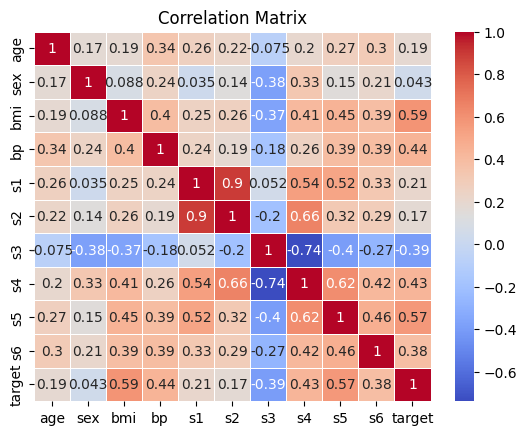

In [14]:
correlation_matrix = diabetes_df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

The variable with the highest absolute correlation with 'target': bmi
Mean Squared Error: 4061.8259284949268


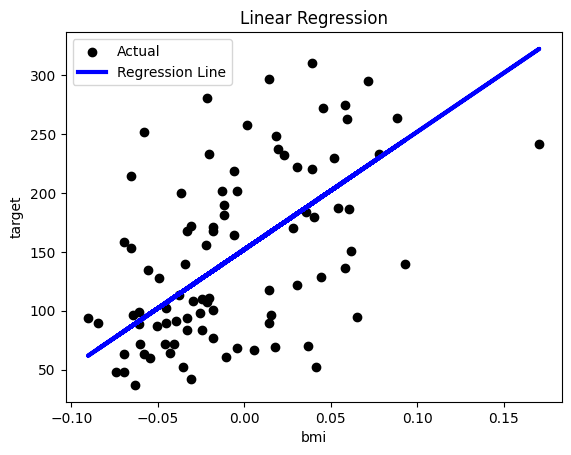

In [81]:
  from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
best_variable = diabetes_df.corr()['target'].abs().sort_values(ascending=False).index[1]
print(f"The variable with the highest absolute correlation with 'target': {best_variable}")
X = diabetes_df[[best_variable]]
y = diabetes_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel(best_variable)
plt.ylabel('target')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [78]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (Coefficient): 998.5
Intercept: 152.5


In [84]:
model.coef_[0] = 998.5
model.intercept_ = 152.5

y_pred_changed = model.predict(X_test)

# Evaluate the model performance after changing coefficients
mse_changed = mean_squared_error(y_test, y_pred_changed)
print(f"Mean Squared Error after changing coefficients: {mse_changed}")

Mean Squared Error after changing coefficients: 4061.345409232599


In [47]:
# import numpy as np
# mse_values = []

# # Gradient Descent
# for iteration in range(num_iterations):
#     # Calculate predictions
#     predictions = slope * X_train_scaled + intercept

#     # Calculate errors
#     errors = predictions - y_train

#     # Update coefficients using gradient descent
#     slope -= learning_rate * 2 * np.dot(errors, X_train_scaled) / len(X_train_scaled)
#     intercept -= learning_rate * 2 * np.sum(errors) / len(X_train_scaled)

#     # Calculate MSE for visualization
#     mse = mean_squared_error(y_train, predictions)
#     mse_values.append(mse)

# # Make predictions on the test set using the final coefficients
# y_pred_test = slope * X_test_scaled + intercept

# # Evaluate the final model performance on the test set
# mse_test = mean_squared_error(y_test, y_pred_test)
# print(f"Final Mean Squared Error on Test Set: {mse_test}")

# # Visualize MSE values over iterations
# plt.plot(range(num_iterations), mse_values, marker='o', linestyle='-', color='b')
# plt.title('Gradient Descent - MSE over Iterations')
# plt.xlabel('Iteration')
# plt.ylabel('Mean Squared Error')
# plt.show()

ValueError: Data must be 1-dimensional

Final Mean Squared Error on Test Set: 4061.8373422328705


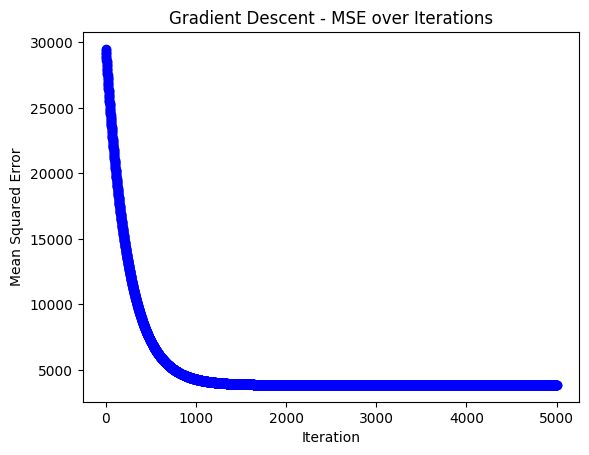

In [89]:
X_scaled = (X - X.mean()) / X.std()


X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


theta = np.random.rand(X_train.shape[1])

# Hyperparameters
learning_rate = 0.001
epochs = 5000

# Lists to store MSE values for visualization
mse_values = []

# Gradient Descent
for iteration in range(epochs):
    # Calculate predictions
    predictions = np.dot(X_train, theta)

    # Calculate errors
    errors = predictions - y_train

    # Update coefficients using gradient descent
    gradient = 2 * np.dot(errors, X_train) /len(X_train)
    theta -= learning_rate * gradient

    # Calculate MSE for visualization
    mse = mean_squared_error(y_train, predictions)
    mse_values.append(mse)

# Make predictions on the test set using the final coefficients
y_pred_test = np.dot(X_test, theta)

# Evaluate the final model performance on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Final Mean Squared Error on Test Set: {mse_test}")

# Visualize MSE values over iterations
plt.plot(range(epochs), mse_values, marker='o', linestyle='-', color='b')
plt.title('Gradient Descent - MSE over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.show()

Final Slope: 47.55143244069289
Final Intercept: 151.99693432718553
Mean Squared Error: 3854.112693415436


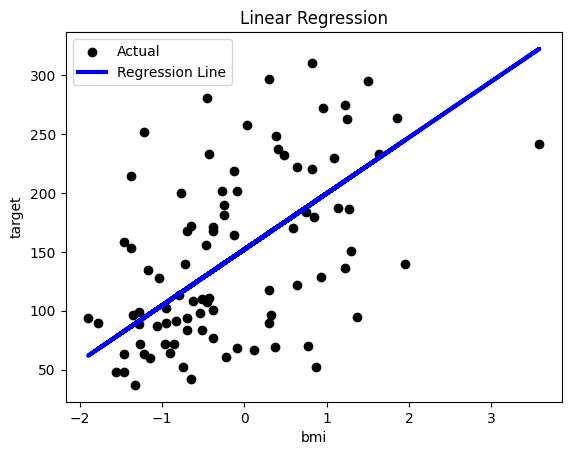

In [72]:
print("Final Slope:", theta[1])
print("Final Intercept:", theta[0])
print(f"Mean Squared Error: {mse}")
plt.scatter(X_test[:, 1], y_test, color='black', label='Actual')  # Use X_test[:, 1] as the x-axis
plt.plot(X_test[:, 1], y_pred_test, color='blue', linewidth=3, label='Regression Line')
plt.xlabel(best_variable)
plt.ylabel('target')
plt.title('Linear Regression')
plt.legend()
plt.show()